In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
#Importing the dataset with date as index
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%y %H:%M')
df = pd.read_csv('../datatraining.csv', sep=";", parse_dates=True, index_col='date', date_parser=dateparse)
df.head()

,id,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-04 17:51:00,1,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:00,2,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,3,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,4,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,5,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
#Set X and Y
Occ=df['Occupancy'].copy()
X = df['Light'].values
y = Occ

In [4]:
#Get a dataset with only Light
Light = df['Light'].copy()

In [5]:
#Making more datasets with the division for DAY
hour = [g for n, g in Light.groupby(pd.TimeGrouper('H'))]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


In [6]:
#Deleting the first and the last day, they are not completed
del hour[0]
del hour[-1]

In [7]:
for i in range (0, len(hour)):
    if len(hour[i])==59 :
        print(len(hour[i]))
    elif len(hour[i])==60 :
        hour[i] = hour[i][: len(hour[i]) - 1] 
        print(len(hour[i]))
    else:
        hour[i] = hour[i][: len(hour[i]) - 2]
        print(len(hour[i]))

59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59
59


In [8]:
#Trasform the the list in array
X_train=np.asarray(hour)

In [9]:
Occ = df['Occupancy'].copy()
OccH = [g for n, g in Occ.groupby(pd.TimeGrouper('H'))]
del OccH[-1]
del OccH[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


In [10]:
#Give to each timeseries the corresponding class based on the most common of the hour
from collections import Counter
for i in range (0, len(OccH)):
    OccH[i]=Counter(OccH[i]).most_common()[0][0]

In [11]:
#From list to np.array
y_train=np.asarray(OccH)

In [12]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [13]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y_train))
#print(len(set(y_train)))
print('n_ts', n_ts)
print('ts_sz', ts_sz)

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=2,
                                                       l=0.8,
                                                       r=1)


print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 135
ts_sz 59
n_classes 2
shapelet_sizes {47: 3}


In [14]:
set(y_train)

{0, 1}

In [15]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.07,
                        max_iter=250,
                        verbose=1)

In [16]:
shp_clf.fit(X_train, y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/250
135/135 [==============================] - 0s 2ms/step - loss: 3.4294 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 2/250
135/135 [==============================] - 0s 82us/step - loss: 3.4291 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 3/250
135/135 [==============================] - 0s 78us/step - loss: 3.4289 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 4/250
135/135 [==============================] - 0s 91us/step - loss: 3.4287 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 5/250
135/135 [==============================] - 0s 75us/step - loss: 3.4284 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 6/250
135/135 [==============================] - 0s 29us/step - loss: 3.4282 - binary_accuracy: 0.7926

Epoch 54/250
135/135 [==============================] - 0s 30us/step - loss: 3.4175 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 55/250
135/135 [==============================] - 0s 88us/step - loss: 3.4173 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 56/250
135/135 [==============================] - 0s 46us/step - loss: 3.4170 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 57/250
135/135 [==============================] - 0s 31us/step - loss: 3.4168 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 58/250
135/135 [==============================] - 0s 30us/step - loss: 3.4166 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 59/250
135/135 [==============================] - 0s 57us/step - loss: 3.4164 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 60/250
135/135 [==============================] - 0s 44us/step - loss: 3.4162 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 61/250
135/135

Epoch 113/250
135/135 [==============================] - 0s 33us/step - loss: 3.4061 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 114/250
135/135 [==============================] - 0s 29us/step - loss: 3.4059 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 115/250
135/135 [==============================] - 0s 23us/step - loss: 3.4058 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 116/250
135/135 [==============================] - 0s 36us/step - loss: 3.4056 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 117/250
135/135 [==============================] - 0s 24us/step - loss: 3.4054 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 118/250
135/135 [==============================] - 0s 34us/step - loss: 3.4052 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 119/250
135/135 [==============================] - 0s 37us/step - loss: 3.4051 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 120/250

Epoch 172/250
135/135 [==============================] - 0s 36us/step - loss: 3.3965 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 173/250
135/135 [==============================] - 0s 62us/step - loss: 3.3964 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 174/250
135/135 [==============================] - 0s 68us/step - loss: 3.3962 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 175/250
135/135 [==============================] - 0s 54us/step - loss: 3.3961 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 176/250
135/135 [==============================] - 0s 47us/step - loss: 3.3959 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 177/250
135/135 [==============================] - 0s 31us/step - loss: 3.3958 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 178/250
135/135 [==============================] - 0s 36us/step - loss: 3.3956 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 179/250

Epoch 231/250
135/135 [==============================] - 0s 31us/step - loss: 3.3884 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 232/250
135/135 [==============================] - 0s 45us/step - loss: 3.3882 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 233/250
135/135 [==============================] - 0s 44us/step - loss: 3.3881 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 234/250
135/135 [==============================] - 0s 35us/step - loss: 3.3880 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 235/250
135/135 [==============================] - 0s 35us/step - loss: 3.3878 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 236/250
135/135 [==============================] - 0s 33us/step - loss: 3.3877 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 237/250
135/135 [==============================] - 0s 27us/step - loss: 3.3876 - binary_accuracy: 0.7926 - binary_crossentropy: 3.3430
Epoch 238/250

ShapeletModel(batch_size=256, max_iter=250, n_shapelets_per_size={47: 3},
              optimizer='sgd', random_state=None, shapelet_length=0.15,
              total_lengths=3, verbose=1, verbose_level=None,
              weight_regularizer=0.07)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
predicted_labels = shp_clf.predict(X_train)
print("Correct classification rate:", accuracy_score(y_train, predicted_labels))

135/135 [==============================] - 0s 301us/step
Correct classification rate: 0.7925925925925926


In [19]:
predicted_locations = shp_clf.locate(X_train)

135/135 [==============================] - 0s 304us/step


/opt/anaconda3/lib/python3.7/site-packages/tslearn/utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 135 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


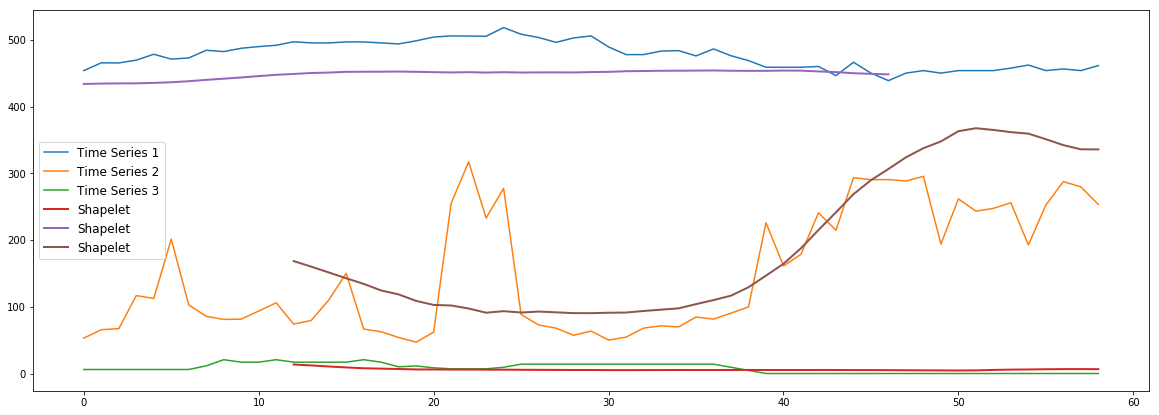

In [38]:
ts_id = 15
plt.figure(figsize=(20,7))
n_shapelets = sum(shapelet_sizes.values())
#plt.title("Example locations of shapelet matches "
#          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X_train[ts_id], label='Time Series 1')
plt.plot(X_train[90], label='Time Series 2')
plt.plot(X_train[95], label='Time Series 3')
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp,label='Shapelet {}'.format(idx_shp), linewidth=2)
plt.legend(loc='best', fontsize=12)

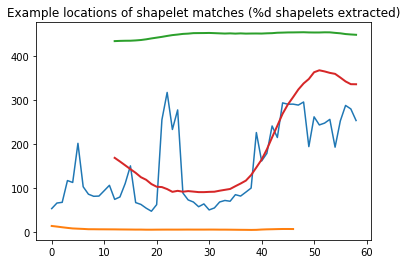

In [21]:
ts_id = 90
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X_train[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

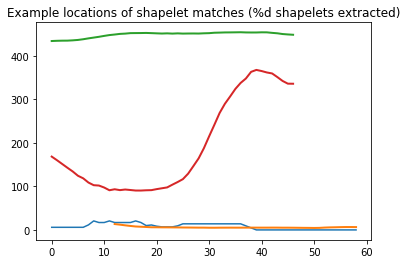

In [22]:
ts_id = 95
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X_train[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

In [23]:
from pyts.transformation import ShapeletTransform

In [24]:
st = ShapeletTransform(n_shapelets=3, window_sizes=[40])
st.fit(X_train, y_train)

ShapeletTransform(criterion='mutual_info', n_jobs=None, n_shapelets=3,
                  random_state=None, remove_similar=True, sort=False, verbose=0,
                  window_sizes=[40], window_steps=None)

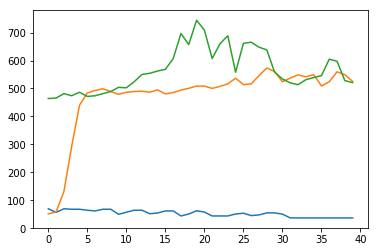

In [25]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()

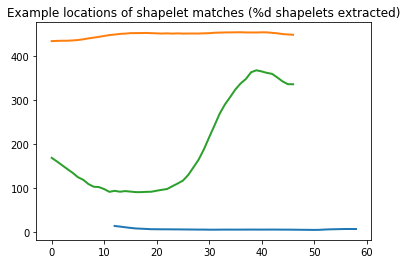

In [26]:
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

#plt.plot(X_train[ts_id])
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint
from pyts.transformation import ShapeletTransform


# Shapelet transformation
st = ShapeletTransform(window_sizes=[12, 24, 36],
                       random_state=42, sort=True)
X_new = st.fit_transform(X_train, y_train)

print(st.indices_)


[[ 43  15  51]
 [ 18   0  36]
 [ 44   4  40]
 [ 45  22  46]
 [ 19  33  45]
 [114  33  57]
 [ 15  22  34]
 [ 21  13  25]
 [ 42  41  53]
 [116  16  40]
 [ 41  47  59]
 [ 40  26  50]
 [ 15   5  17]
 [ 41  26  38]
 [ 20  35  47]
 [ 42  11  23]
 [113  13  25]
 [ 69  16  52]
 [ 93  12  48]
 [ 45   8  20]
 [ 94   0  36]
 [ 87  22  58]
 [ 92  22  58]
 [ 70   0  36]
 [ 42  29  41]
 [116   1  13]
 [ 44  40  52]
 [ 41   2  14]
 [113  35  47]]


In [45]:
len(st.indices_)

29

In [51]:
len(st.shapelets_)

29

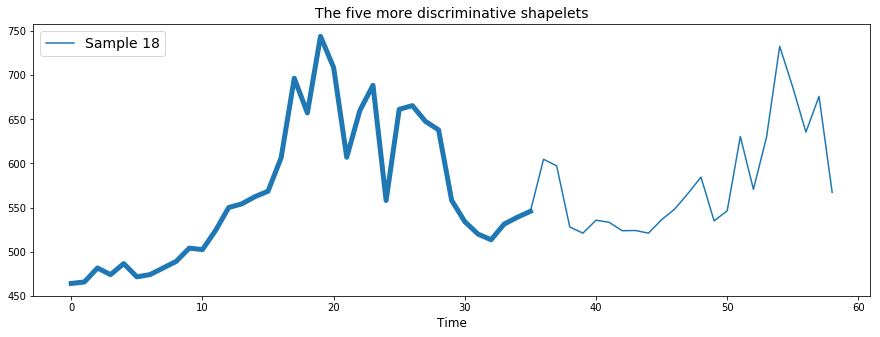

In [59]:
# Visualize the four most discriminative shapelets
plt.figure(figsize=(15, 5))
for i, index in enumerate(st.indices_[1:2]):
    idx, start, end = index
    plt.plot(X_train[idx], color='C{}'.format(i),
             label='Sample {}'.format(idx))
    plt.plot(np.arange(start, end), X_train[idx, start:end],
             lw=5, color='C{}'.format(i))

plt.xlabel('Time', fontsize=12)
plt.title('The five more discriminative shapelets', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

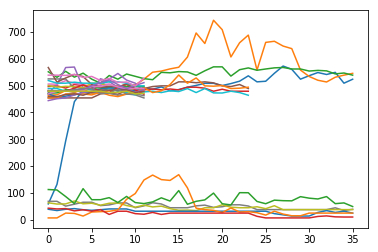

In [56]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()